In [38]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import tensorflow as tf

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


In [39]:
# download data from url https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
url = "https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv"
df = pd.read_csv(url, header=None).to_numpy()
print("Data shape:", df.shape)

Data shape: (162, 2)


In [40]:
X = df[:, 0].reshape(-1, 1)
Y = df[:, 1]

In [41]:
X.shape

(162, 1)

Text(0.5, 1.0, 'Data Distribution')

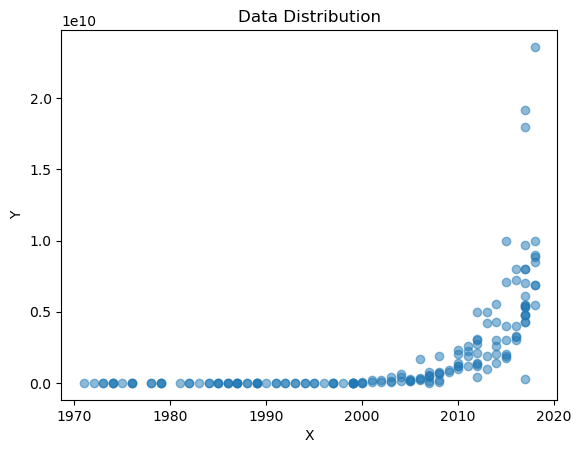

In [42]:
plt.scatter(X, Y, alpha=0.5)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Data Distribution")

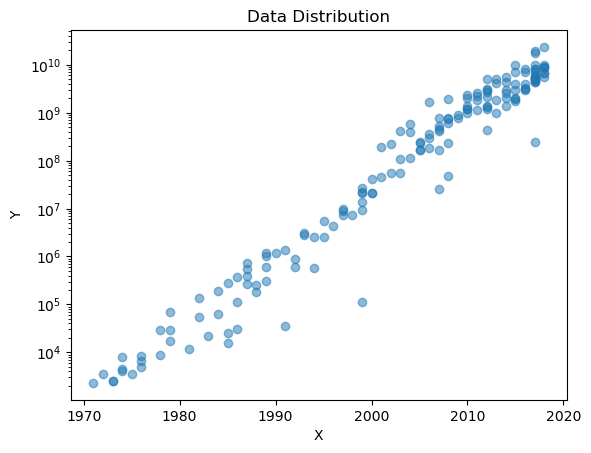

In [43]:
# plot as exponetial distribution
plt.scatter(X, Y, alpha=0.5)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Data Distribution")
plt.yscale("log")

In [44]:
X = X - X.mean()

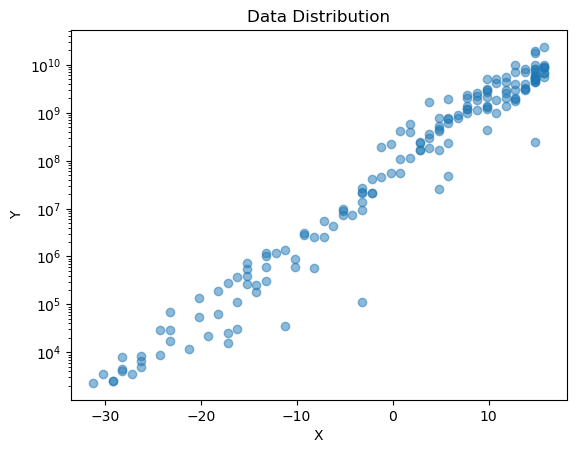

In [45]:
# plot as exponetial distribution
plt.scatter(X, Y, alpha=0.5)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Data Distribution")
plt.yscale("log")

In [46]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(1,)),
        tf.keras.layers.Dense(1, input_shape=(1,), activation="exponential"),
    ]
)

c:\Users\super\miniconda3\envs\pyt12\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer="SGD", loss="mse")

In [52]:
def schedule(epoch, lr):
    if epoch < 100:
        return lr
    else:
        return lr * tf.math.exp(-0.1)


scheduler = tf.keras.callbacks.LearningRateScheduler(schedule, verbose=1)

In [53]:
history = model.fit(X, Y, epochs=200, verbose=0, callbacks=[scheduler])


Epoch 1: LearningRateScheduler setting learning rate to 0.009999999776482582.



Epoch 2: LearningRateScheduler setting learning rate to 0.009999999776482582.

Epoch 3: LearningRateScheduler setting learning rate to 0.009999999776482582.

Epoch 4: LearningRateScheduler setting learning rate to 0.009999999776482582.

Epoch 5: LearningRateScheduler setting learning rate to 0.009999999776482582.

Epoch 6: LearningRateScheduler setting learning rate to 0.009999999776482582.

Epoch 7: LearningRateScheduler setting learning rate to 0.009999999776482582.

Epoch 8: LearningRateScheduler setting learning rate to 0.009999999776482582.

Epoch 9: LearningRateScheduler setting learning rate to 0.009999999776482582.

Epoch 10: LearningRateScheduler setting learning rate to 0.009999999776482582.

Epoch 11: LearningRateScheduler setting learning rate to 0.009999999776482582.

Epoch 12: LearningRateScheduler setting learning rate to 0.009999999776482582.

Epoch 13: LearningRateScheduler setting learning rate to 0.009999999776482582.

Epoch 14: LearningRateScheduler setting learnin

ValueError: The output of the `schedule` function should be a float. Got: 0.009048374369740486

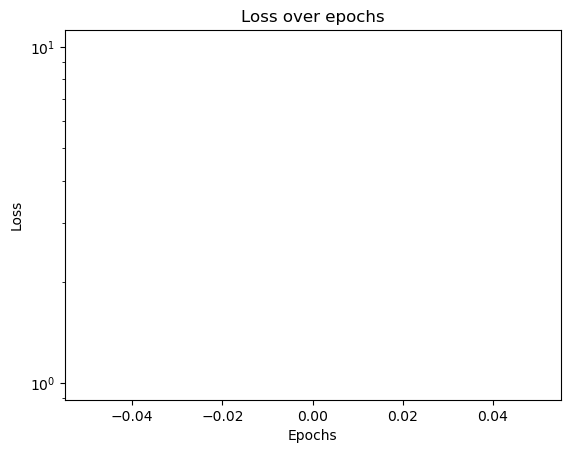

In [ ]:
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss over epochs")
plt.yscale("log")